In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# Load the dataset
file_path = "/content/spotify dataset.csv"
df = pd.read_csv(file_path)

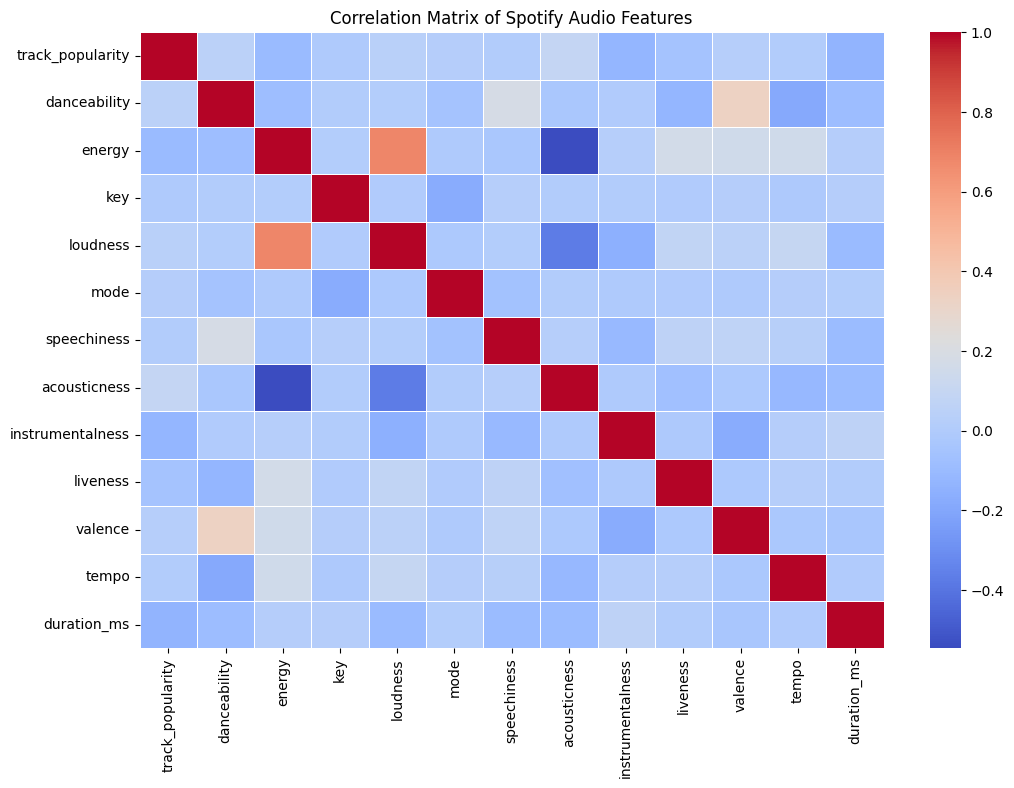

In [7]:
 # 1. Data Cleaning & Preprocessing
df_cleaned = df.dropna(subset=['track_name', 'track_artist'])
df_cleaned = df_cleaned.drop_duplicates(subset=['track_id'])

# Select numerical features
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo']
X = df_cleaned[features]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.corr(numeric_only=True), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Spotify Audio Features")
plt.show()

In [8]:
# 2. Apply DBSCAN Clustering
dbscan = DBSCAN(eps=1.5, min_samples=10)
df_cleaned['cluster'] = dbscan.fit_predict(X_scaled)


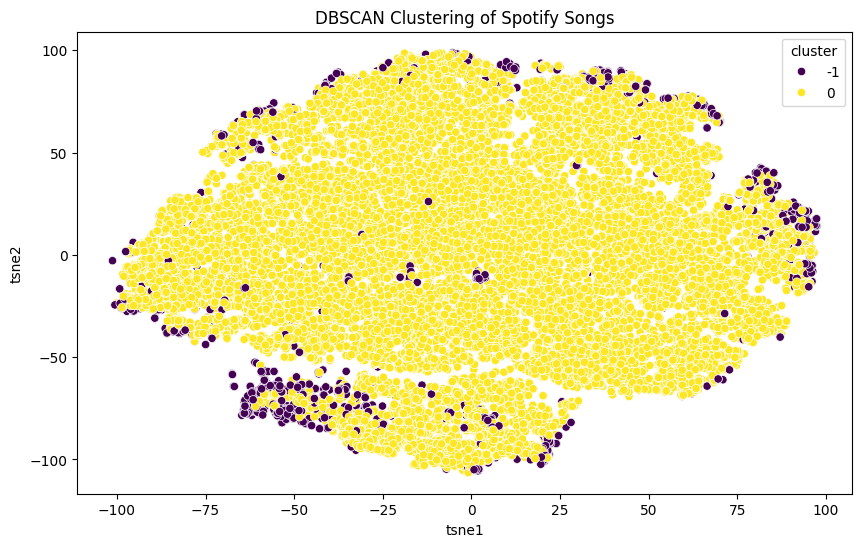

In [9]:
# 3. t-SNE Dimensionality Reduction

perplexity_value = min(30, len(df_cleaned) - 1)

tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Store t-SNE values in DataFrame
df_cleaned['tsne1'] = X_tsne[:, 0]
df_cleaned['tsne2'] = X_tsne[:, 1]

# Scatter plot of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tsne1', y='tsne2', hue=df_cleaned['cluster'], palette='viridis', data=df_cleaned)
plt.title('DBSCAN Clustering of Spotify Songs')
plt.show()

In [10]:
# 4. RECOMMENDATION SYSTEM USING COSINE SIMILARITY
similarity_matrix = cosine_similarity(X_scaled)

def recommend_songs(song_name, n=5):
    """Recommend songs based on cosine similarity"""
    try:
        song_index = df_cleaned[df_cleaned['track_name'].str.lower() == song_name.lower()].index[0]
        similar_indices = similarity_matrix[song_index].argsort()[-(n+1):-1][::-1]
        recommendations = df_cleaned.iloc[similar_indices][['track_name', 'track_artist', 'playlist_genre']]
        return recommendations
    except IndexError:
        return "Song not found in the dataset."

# Example: Recommend 5 songs similar to "Someone You Loved"
print(recommend_songs("Someone You Loved", n=5))

                                              track_name   track_artist  \
22054                                       Feeling Good  Michael Bublé   
26676                                          Bad Blood            Nao   
25778  Baby It's Cold Outside (feat. Christina Aguilera)    CeeLo Green   
1229                                           All of Me    John Legend   
22368                         I'd Rather Go Blind - Live       Dua Lipa   

      playlist_genre  
22054            r&b  
26676            r&b  
25778            r&b  
1229             pop  
22368            r&b  
